Emma Klemets - May 17   
General messing about with things related to the adiabatic parameter k for the UCN guides.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# import sympy as sp
import scipy.constants as const

In [2]:
#importing physical constants that are useful from scipy.constants
m_p = const.physical_constants['proton mass energy equivalent in MeV'][0]
m_n = const.physical_constants['neutron mass energy equivalent in MeV'][0]
c = const.c #m/s
hbar = const.hbar

mu_n = const.physical_constants['neutron mag. mom.'][0] #J T^-1
g_n = const.physical_constants['neutron mag. mom. to nuclear magneton ratio'][0]
gamma_n = const.physical_constants['neutron gyromag. ratio'][0] #s^-1 T^-1, negative

In [3]:
#equation 2 in the CDR - Sect 4.1 for the value of k
def K_equ2(B, dbdx, v_n):
    return gamma_n*B**2 / (v_n*dbdx)

#example values in the CDR - Sect 4.1
print(K_equ3_12(1e-3, 20e-3 *100, 8))

print(K_equ3_12(0.1e-3, .2e-3 *100, 8))

NameError: name 'K_equ3_12' is not defined

In [4]:
'''
Equ. 3.6-3.9 in E. Pierre, 2012
https://tel.archives-ouvertes.fr/tel-00726870/document

"the expressions of the polarization along the x, y and z 
axis as a function of the rotation angle θ for an initially 
fully polarized UCN along the x axis"
- these assume that the B field does not change magnitude during the rotation
'''

def Px(theta, k):
    return (np.cos(theta)*(k**2 + np.cos(theta*np.sqrt(1+k**2))) + \
            np.sqrt(1+k**2)*np.sin(theta)*np.sin(theta*np.sqrt(1+k**2)) )/ (1+k**2)

def Py(theta, k):
    return (k - k*np.cos(theta*np.sqrt(1+k**2))) / (1+k**2)

def Pz(theta, k):
    return np.sin(theta)*(k**2 + np.cos(theta*np.sqrt(1+k**2)))/(1+k**2) - \
           np.cos(theta)*np.sin(theta*np.sqrt(1+k**2))/np.sqrt(1+k**2)

def P_tot(theta, k): #this should just stay at 1, which it does
    return np.sqrt( Px(theta, k)**2 +  Py(theta, k)**2 +  Pz(theta, k)**2)

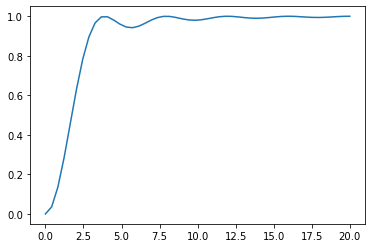

In [5]:
k = np.linspace(0, 20)

theta = np.pi/2
plt.plot(k, Pz(theta, k))
plt.show()

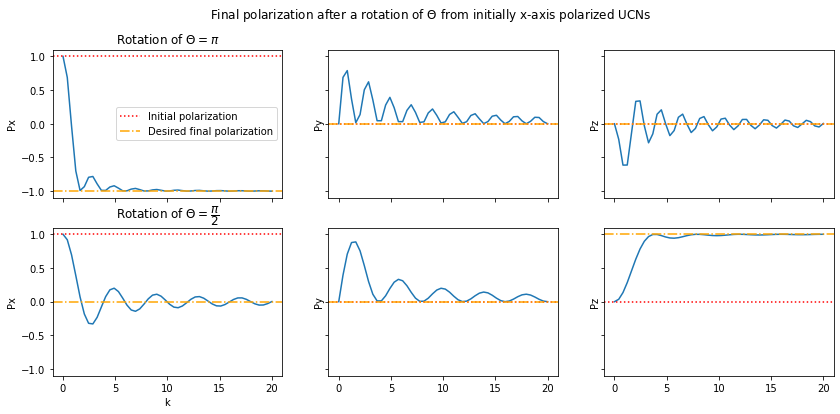

In [6]:
fig, axs = plt.subplots(2, 3, figsize=(14,6), sharex=True, sharey=True)
plt.suptitle("Final polarization after a rotation of $\Theta$ from initially x-axis polarized UCNs")

theta_arr = [np.pi, np.pi/2]
theta_arr_lab = ["\pi", "\dfrac{\pi}{2}"]
direction = [0,1,2]
direction_lab = ["Px", "Py", "Pz"]
P_vec = [Px, Py, Pz]
intial_P = [1, 0, 0]

wanted_final_P = [[-1, 0, 0],[0, 0, 1]]

j = 0
for t in theta_arr:
    axs[j, 0].set_title("Rotation of $\Theta = {}$".format(theta_arr_lab[j]))
    
    for i in direction:
        axs[j, i].plot(k, P_vec[i](t, k))
        axs[j, i].axhline(y=intial_P[i], color='r', linestyle=':', label="Initial polarization")
        axs[j, i].axhline(y=wanted_final_P[j][i], color='orange', linestyle='-.', label="Desired final polarization")
        axs[j, i].set_ylabel(direction_lab[i])
        
    j += 1

axs[0,0].legend()
axs[1,0].set_xlabel("k")
plt.show()